I computed realizations of multiple HODs for a few statistics in the darksky boxes. This notebook is gonna combine them into a jackknife covmat. It'll also add some estimate of the shape noise contribution. 

In [84]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.colors as colors

In [85]:
import numpy as np
from glob import glob
from os import path

In [86]:
output_dir = '/home/users/swmclau2/Git/pearce/bin/covmat/ds14_covmat_v2/'

In [87]:
outputs = sorted(glob(path.join(output_dir, 'vdf_darksky_obs_???.npy')))
print len(outputs)

512


In [88]:
N = len(outputs) # Should be 512, but a few may not have finished. Should make sure that those get reestarted, but likely not super important
all_outputs = np.zeros((N, 5,  18)) # num bins and num HODs 

In [89]:
for i,output_file in enumerate(outputs):
    output = np.load(output_file)

    all_outputs[i] = output#.mean(axis = 0)

In [90]:
all_outputs.shape

(512, 5, 18)

In [91]:
rp_bins = np.logspace(-1.0, 1.6, 19)

In [92]:
rp_points = (rp_bins[1:]+rp_bins[:-1])/2.0

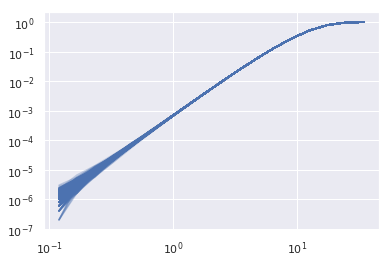

In [93]:
hod_idx = 2
plt.plot(rp_points, (all_outputs[:, hod_idx]).T, alpha = 0.3, color = 'b')
plt.loglog();


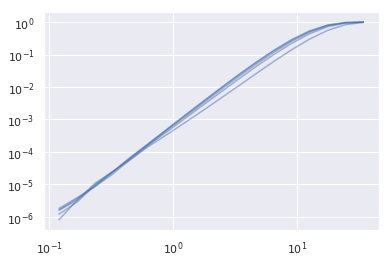

In [94]:
box_idx = 215
plt.plot(rp_points, (all_outputs[box_idx,:,:]).T, alpha = 0.5, color = 'b')
plt.loglog();


In [95]:
mean = all_outputs.mean(axis = 0)

In [96]:
R =(all_outputs - mean)

cov = np.zeros((R.shape[2], R.shape[2]))
for i in xrange(R.shape[1]):
    cov+= R[:,i].T.dot(R[:,i])#/(N-1)
    
cov/=R.shape[1]*(N-1)

In [97]:
cov.shape

(18, 18)

In [98]:
np.min(cov)

-1.388968275520374e-10

In [99]:
def cov_to_corr(cov):
    std = np.sqrt(np.diag(cov))
    
    denom = np.outer(std, std)
    
    return cov/denom

In [100]:
cmap = sns.diverging_palette(240, 10, n=7, as_cmap = True)

In [101]:
corr = cov_to_corr(cov)

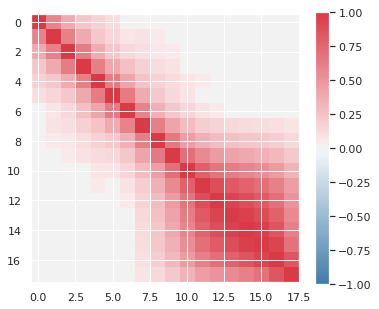

In [102]:
fig = plt.figure(figsize = (6, 5))
im = plt.imshow(corr, cmap = cmap, vmin = -1)
plt.colorbar(im);

[]

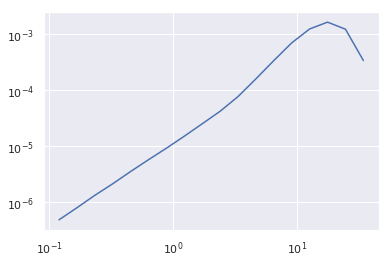

In [103]:
plt.plot(rp_points, np.sqrt(np.diag(cov)), label = 'Sim')
plt.loglog()

In [104]:
emu_cov_fname = '/home/users/swmclau2/Git/pearce/bin/optimization/vdf_hod_emu_cov_lpw.npy'

In [105]:
emu_cov = np.load(emu_cov_fname)

In [106]:
emu_corr = cov_to_corr(emu_cov)

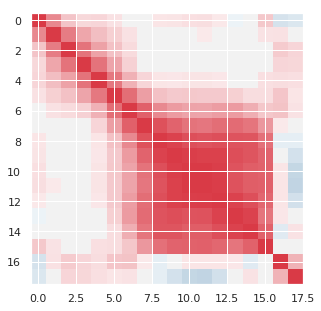

In [107]:
fig = plt.figure(figsize = (6, 5))

plt.imshow(emu_corr, cmap = cmap, vmin = -1)

In [108]:
full_emu_cov = cov + emu_cov

In [109]:
full_emu_corr = cov_to_corr(full_emu_cov)

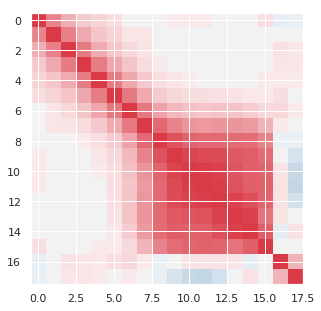

In [110]:
fig = plt.figure(figsize = (6, 5))

plt.imshow(full_emu_corr, cmap = cmap, vmin = -1)

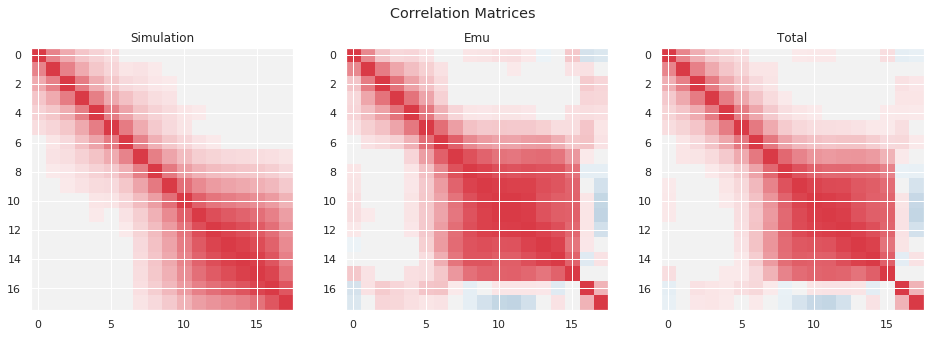

In [111]:
fig = plt.figure(figsize = (16, 5))
plt.suptitle('Correlation Matrices')
plt.subplot(131)
plt.title('Simulation')
plt.imshow(corr, cmap = cmap, vmin = -1)
plt.subplot(132)
plt.title('Emu')
plt.imshow(emu_corr, cmap = cmap, vmin = -1)
plt.subplot(133)
plt.title('Total')
plt.imshow(full_emu_corr, cmap = cmap, vmin = -1)

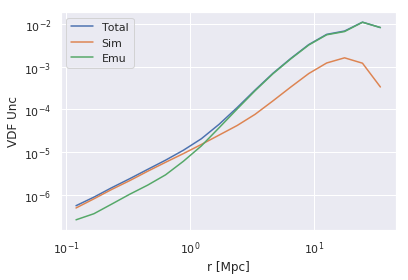

In [112]:
plt.plot(rp_points, np.sqrt(np.diag(full_emu_cov) ), label = 'Total')
plt.plot(rp_points, np.sqrt(np.diag(cov) ), label = 'Sim')
plt.plot(rp_points, np.sqrt(np.diag(emu_cov) ), label ='Emu')


plt.ylabel('VDF Unc')
plt.xlabel('r [Mpc]')
plt.loglog()
plt.legend(loc='best')

In [113]:
mean_val = mean.mean(axis=0)

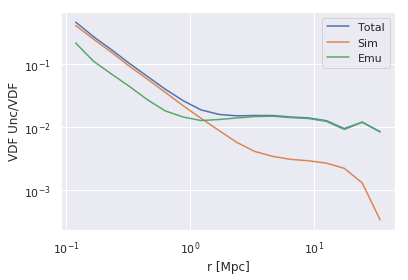

In [114]:
plt.plot(rp_points, np.sqrt(np.diag(full_emu_cov) )/mean_val, label = 'Total')
plt.plot(rp_points, np.sqrt(np.diag(cov) )/mean_val, label = 'Sim')
plt.plot(rp_points, np.sqrt(np.diag(emu_cov) )/mean_val, label ='Emu')


plt.ylabel('VDF Unc/VDF')
plt.xlabel('r [Mpc]')
plt.loglog()
plt.legend(loc='best')